In [82]:
import numpy as np
import pandas as pd
import csv as csv
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("titanic_data.csv") #data is imported as a DataFrame
data_full = pd.read_csv("titanic_data.csv")

Populating the interactive namespace from numpy and matplotlib


# Step 1: Questions about the dataset

#### Q1. What is the distribution of all passengers across, age, gender, ticket cost, and passenger class? 
#### Q2. How do the Survivors and Deceased passengers compare in Age?   
#### Q3. How do the Survivors and Deceased passengers compare in Passenger Class?  
#### Q4. How do the Survivors and Deceased passengers compare in Gender?   
#### Q5. How do the Survivors and Deceased passengers compare in Fare Price?   
#### Q6. How do the Survivors and Deceased passengers compare by Siblings and Spouses aboard?  
#### Q7. What is the distribution of ticket prices for each Port of Embarkation?

# Step 2: Wrangle the data

#### I started by looking at the data from a high level:

In [45]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### I checked if the data had any null values: 

In [175]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Age has 177 missing values, which I can deal with by dropping the NA's. Cabin has 687 values, which would be hard to replace, so I might not work with this data. I checked that this worked, and indeed there are 0 missing values for Age now.

In [20]:
data['Age'].dropna(inplace=True)
data['Age'].fillna(np.mean(data['Age'])) 
data['Age'].isnull().sum()

0

#### I would like to make a histogram of the males and females, so I'll convert males to 0 and females to 1, since histograms can't be made with strings.

In [139]:
data['Sex'][data['Sex']=='female'] = 1
data['Sex'][data['Sex']=='male'] = 0

C:\Users\t_kapam\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\t_kapam\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


#### Create a dataframe of only survived passengers and replace NAs with mean age of survived passengers

In [26]:
survived = data.loc[data['Survived'] == 1]
survived.Age = survived.Age.fillna(np.mean(survived.Age))

#### Create a dataframe of only deceased passengers and replace NAs with mean age of deceased passengers

In [115]:
deceased = data.loc[data['Survived'] == 0]
deceased.Age = deceased.Age.fillna(np.mean(deceased.Age))

# Step 3: Explore

### Q1 - What is the distribution of all passengers across, age, gender, ticket cost, and passenger class?

In [2]:
def plot_hist(column, title, xlabel, ylabel):
    plt.hist(column)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def describe_num(column):
    num = column.describe()
    return num
    
def describe_cat(column):
    cat = pd.Series(column, dtype="category")
    cat = cat.describe()
    return cat

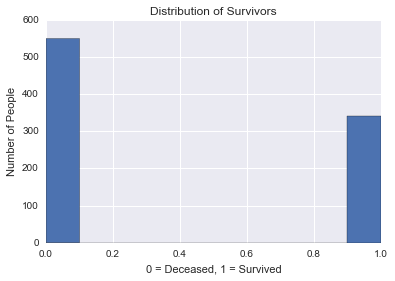

count     891
unique      2
top         0
freq      549
Name: Survived, dtype: int64

In [51]:
plot_hist(data['Survived'], "Distribution of Survivors", "0 = Deceased, 1 = Survived", "Number of People")
describe_cat(data['Survived'])

#### This chart shows that the more people died than survived in this dataset

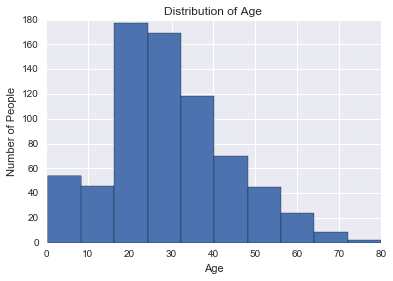

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [50]:
plot_hist(data['Age'], "Distribution of Age", "Age", "Number of People")
describe_num(data['Age'])

#### Distribution of ages across the entire dataset. I made this chart to understand the Age of the sample

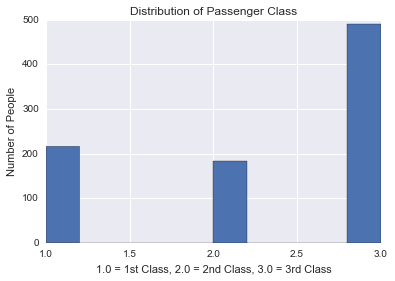

count     891
unique      3
top         3
freq      491
Name: Pclass, dtype: int64

In [49]:
plot_hist(data['Pclass'], "Distribution of Passenger Class", "1.0 = 1st Class, 2.0 = 2nd Class, 3.0 = 3rd Class", 
         "Number of People")
describe_cat(data['Pclass'])

#### I made this chart to check the distribution of passenger class 

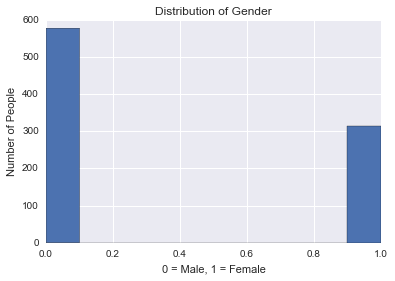

count     891
unique      2
top         0
freq      577
Name: Sex, dtype: int64

In [140]:
plot_hist(data['Sex'], "Distribution of Gender", "0 = Male, 1 = Female", "Number of People")
describe_cat(data['Sex'])

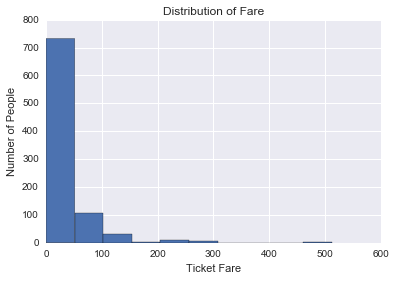

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [53]:
plot_hist(data['Fare'], "Distribution of Fare", "Ticket Fare", "Number of People")
describe_num(data['Fare'])

#### This chart shows that the majority of fare prices paid were less than 100. However, it would be more interesting to zoom into the 0 to 100 price range

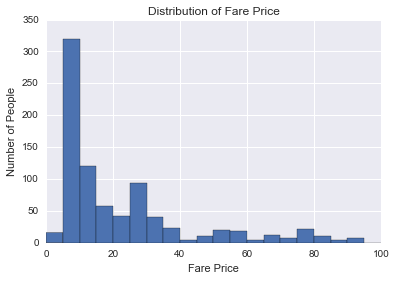

In [98]:
plt.hist(data['Fare'], range=[0,100], bins = 20)
plt.title("Distribution of Fare Price")
plt.xlabel("Fare Price")
plt.ylabel("Number of People")
plt.show()

#### A more granular look at the data shows that the majority of ticket prices were around 5 dollars. Some people even got on the Titanic for almost nothing, but they unfortunately paid the ultimate price...

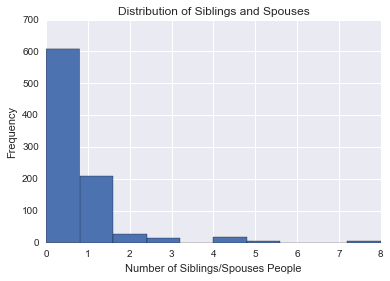

count     891
unique      7
top         0
freq      608
Name: SibSp, dtype: int64

In [54]:
plot_hist(data['SibSp'], "Distribution of Siblings and Spouses", "Number of Siblings/Spouses People", "Frequency")
describe_cat(data['SibSp'])

#### I looked at the distribution of siblings and spouses and found that the majority were solo travelers.

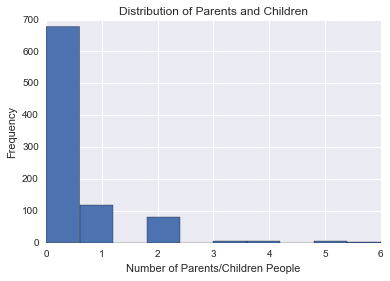

count     891
unique      7
top         0
freq      678
Name: Parch, dtype: int64

In [55]:
plot_hist(data['Parch'], "Distribution of Parents and Children", "Number of Parents/Children People", "Frequency")
describe_cat(data['Parch'])

#### I looked at the distribution of parents and children and again found that the majority were solo travelers.

#### Let's take a look at the Deceased and Survivors at a high level before making comparisons. The chars quickly show that the number of deceased is greater than the survivors.

In [106]:
deceased.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342,342.000000,342.000000,342.000000,342.000000,342.000000
mean,444.368421,1,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0,0.863321,13.763871,0.708688,0.771712,66.596998
min,2.000000,1,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1,1.000000,21.000000,0.000000,0.000000,12.475000
50%,439.500000,1,2.000000,28.343690,0.000000,0.000000,26.000000
75%,651.500000,1,3.000000,35.000000,1.000000,1.000000,57.000000
max,890.000000,1,3.000000,80.000000,4.000000,5.000000,512.329200


In [108]:
survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342,342.000000,342.000000,342.000000,342.000000,342.000000
mean,444.368421,1,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0,0.863321,13.763871,0.708688,0.771712,66.596998
min,2.000000,1,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1,1.000000,21.000000,0.000000,0.000000,12.475000
50%,439.500000,1,2.000000,28.343690,0.000000,0.000000,26.000000
75%,651.500000,1,3.000000,35.000000,1.000000,1.000000,57.000000
max,890.000000,1,3.000000,80.000000,4.000000,5.000000,512.329200


### Q2. How do the Survivors and Deceased passengers compare in Age?  

In [115]:
#Some more data wrangling to create a dataframe of only deceased passengers and replace NAs with mean age of deceased passengers
deceased = data.loc[data['Survived'] == 0]
deceased.Age = deceased.Age.fillna(np.mean(deceased.Age))

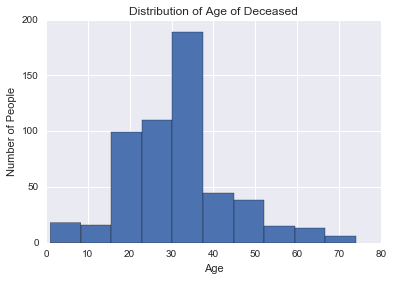

count    549.000000
mean      30.626179
std       12.451292
min        1.000000
25%       23.000000
50%       30.626179
75%       35.000000
max       74.000000
Name: Age, dtype: float64

In [121]:
plot_hist(deceased['Age'], "Distribution of Age of Deceased", "Age", "Number of People")
describe_num(deceased['Age'])

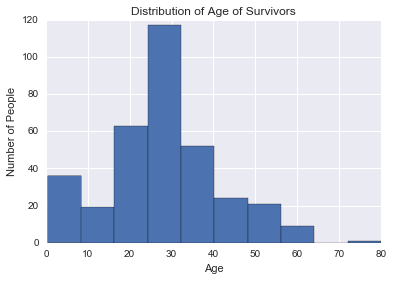

count    342.000000
mean      28.343690
std       13.763871
min        0.420000
25%       21.000000
50%       28.343690
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [120]:
plot_hist(survived['Age'], "Distribution of Age of Survivors", "Age", "Number of People")
describe_num(survived['Age'])

#### These charts show that the mean and median ages of the Survivors and Deceased were basically the same. 

### Q3. How do the Survivors and Deceased passengers compare by Passenger Class?  

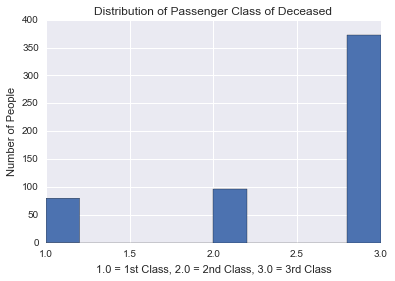

count     549
unique      3
top         3
freq      372
Name: Pclass, dtype: int64

In [122]:
plot_hist(deceased['Pclass'], "Distribution of Passenger Class of Deceased", "1.0 = 1st Class, 2.0 = 2nd Class, 3.0 = 3rd Class", 
          "Number of People")
describe_cat(deceased['Pclass'])

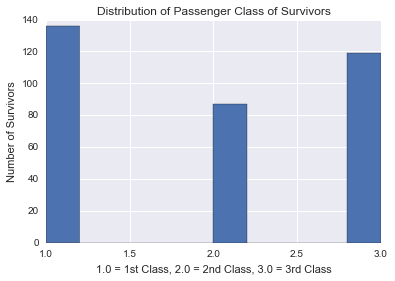

count     342
unique      3
top         1
freq      136
Name: Pclass, dtype: int64

In [123]:
plot_hist(survived['Pclass'], "Distribution of Passenger Class of Survivors", "1.0 = 1st Class, 2.0 = 2nd Class, 3.0 = 3rd Class", 
          "Number of Survivors")
describe_cat(survived['Pclass'])

#### I made these charts to see how death and survival compared by class. Third class passengers had the highest number of deaths, while First class had the highest number of survivors.

### Q4. How do the Survivors and Deceased passengers compare by Gender?  

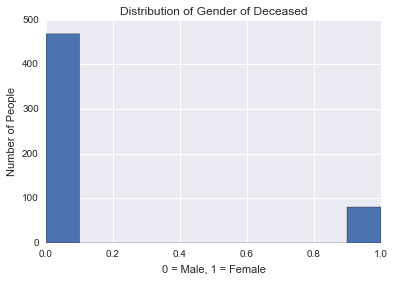

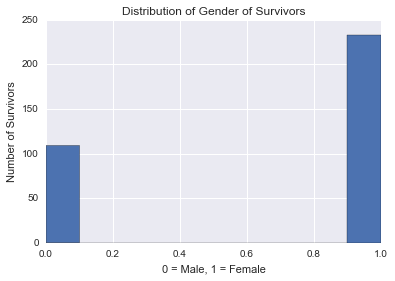

count     549
unique      2
top         0
freq      468
Name: Sex, dtype: int64

In [109]:
plot_hist(deceased['Sex'], "Distribution of Gender of Deceased", "0 = Male, 1 = Female", "Number of People")
describe_cat(survived['Sex'])

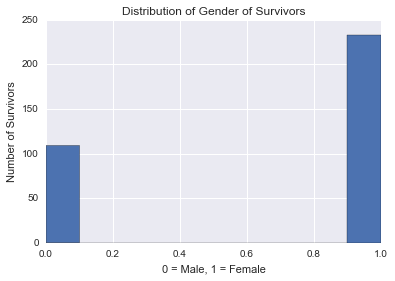

count      549
unique       2
top       male
freq       468
Name: Sex, dtype: object

In [124]:
plot_hist(survived['Sex'], "Distribution of Gender of Survivors", "0 = Male, 1 = Female", "Number of Survivors")
describe_cat(deceased['Sex'])

#### These charts show that it was primarily males that died on the Titanic.

### Q5. How do the Survivors and Deceased passengers compare by Fare Price?  

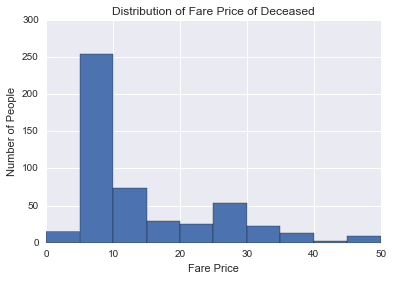

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

In [127]:
plt.hist(deceased['Fare'], range=[0,50])
plt.title("Distribution of Fare Price of Deceased")
plt.xlabel("Fare Price")
plt.ylabel("Number of People")
plt.show()

describe_num(deceased['Fare'])

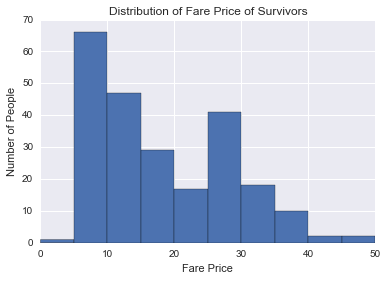

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

In [129]:
plt.hist(survived['Fare'], range=[0,50])
plt.title("Distribution of Fare Price of Survivors")
plt.xlabel("Fare Price")
plt.ylabel("Number of People")
plt.show()

describe_num(survived['Fare'])

#### These charts show that the passengers who died did not pay a high fare price, and that the survivors paid a higher ticket price. 

### Q6. How do the Survivors and Deceased passengers compare by Siblings and Spouses aboard?  

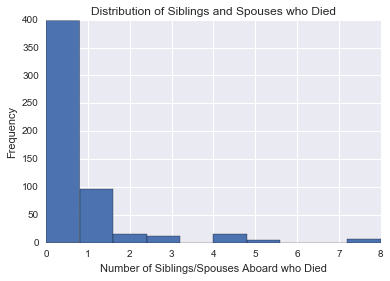

count     549
unique      7
top         0
freq      398
Name: SibSp, dtype: int64

In [135]:
plot_hist(deceased['SibSp'], "Distribution of Siblings and Spouses who Died", "Number of Siblings/Spouses Aboard who Died", "Frequency")
describe_cat(deceased['SibSp'])

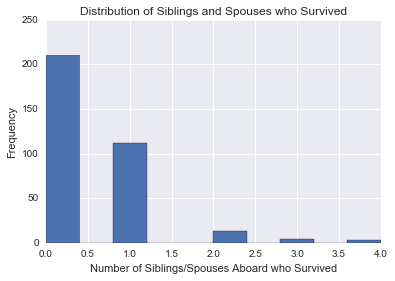

count     342
unique      5
top         0
freq      210
Name: SibSp, dtype: int64

In [136]:
plot_hist(survived['SibSp'], "Distribution of Siblings and Spouses who Survived", "Number of Siblings/Spouses Aboard who Survived", "Frequency")
describe_cat(survived['SibSp'])

#### These charts show that people with 1 sibling and spouse had more survivors

### Q7. What is the distribution of ticket prices for each Port of Embarcation?

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

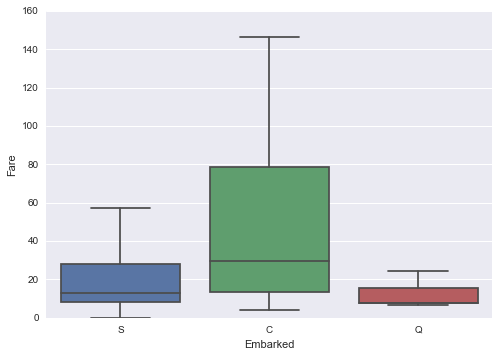

In [37]:
sns.boxplot(data.Embarked, data.Fare, showfliers=False)
describe_num(data.Embarked)

# Step 4: Draw Conclusions

### This data is a subset of the passengers aboard the Titanic. It includes data on 891 passengers with variables on age, passenger class, fare, the number of siblings/spouses aboard, the number of parents/children aboard, and whether the passenger survived. 

### I started by exploring the data at a high level and found that 549 passengers died and 342 passengers survived. The mean age is 29.6 years old, and 491 passengers were in 3rd class. There are are also 577 males on board with 314 females. Finally, the average fare price was 32 dollars.

### Then I analyzed the of the deceased passengers. I found that it was mostly males who died, the majority of passengers were aged 20-40 (mean of 30.6 years), most of the passengers were in 3rd class, and the majority of fare paid was less than 10 dollars. 

### The data shows that males from 3rd class had the lowest survival rate. I will perform a test to check the statistical significance of whether 3rd class passengers are more likely to die on the Titanic by using the fare price as a proxy for class. Since I will be comparing a continuous variable (fare price) to a dichotomous variable (survival or death), I will calculate the Point-biserial coefficient.

In [168]:
#Point-biserial calculation as given on Wikipedia page: https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient

#Sample standard deviation of the fare price
s = std(data.Fare, ddof=1)
#Mean fare for Survivors
M_1 = survived.Fare.mean()
#Mean fare for Deceased
M_0 = deceased.Fare.mean()
#Number of survivors
n_1 = survived.PassengerId.count()
#Number of deceased
n_0 = deceased.PassengerId.count()
#Total
n = float(n_0 + n_1)
#Calculate Point-biserial correlation coefficient
#r = (M_1-M_0)*(1/s)*sqrt((n_1*n_0)/(n^2))
mean_diff = (M_1-M_0)/s
sqrt = math.sqrt((n_1*n_0)/(n*n))
r = mean_diff*sqrt
print r

0.25716208986


### The point-biserial calculation indicates a positive realtionship between fare price and survival, but it is not very strong. A strong correlation would have an r-value greater than 0.7. Conducting a statistical test is important so that we can draw stronger conclusions about determining surival or death. Other variables to test survival against are Age and Passenger Class.

### Exploring the survivor data, I found that it was mostly females who survived, the majority of passengers were aged 20-40 (mean of 28.3 years), most of the passengers were in 1st class, and the mean fare price paid was 48 dollars. Finally, I created a box plot which shows that the majority of low paying passengers boarded the ship at Queenstown and Southamption, while the high paying passengers boarded at Queenstown. 

### While this dataset can be used to draw conclusions, there are several limitations to be considered. First, there are only 891 passenger datapoints, which is only 67% of the total number of passengers. Having information on all 1,317 (1) passengers would make the analysis complete. There were also 177 missing values for the passenger's Age that I had to impute with the mean. The benefit of imputing missing values, rather than dropping them all together, is that I was able to keep the rest of the data points that come with each passenger. The drawback is that making conclusions from imputed data could be misleading, so any statistical test which relates to Age must be viewed critically. One interesting variable would be to show what part of the ship each passenger was staying in. The ship could be broken out into a number of zones, and then I could analyze the Survival of each zone. Unfortunately, the cabin data is missing 687 values so this is another limitation to the dataset. Other vFurthermore, these conclusions are based only data exploration and visulation instead of statistical testing. For example, the analysis could be more rigorous if the association between Gender and Survival was quantified using the Chi-Square Test of Independence, which determines whether two categorical variables are associated.


##### (1) https://en.wikipedia.org/wiki/RMS_Titanic

# Step 5: Communicate

### This analysis explored which factors lead to survival or death on the Titanic. From analyzing the sample data, I found the majority of the passengers who died on the Titanic were 3rd class males, as shown in the bar charts below. The fare price, which is a proxy for class, has a slightly positive correlation with surivival - meaning the more you paid the higher chance of surivival. However, the majority of the passengers on the Titanic were in 3rd class, so there were simply more of them. The fact that mostly males died hints that they helped the women survive.

C:\Users\t_kapam\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\t_kapam\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


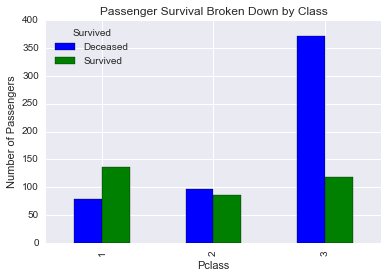

In [86]:
#Change the 0 and 1 in the Surivivor column to Survived and Deceased to make the chart easier to read
data_full['Survived'][data_full['Survived']==1] = "Survived"
data_full['Survived'][data['Survived']==0] = "Deceased"

ax = data_full.groupby(['Pclass','Survived'])['PassengerId'].count().unstack().plot(kind='bar', 
        title = "Passenger Survival Broken Down by Class")
ax = ylabel("Number of Passengers")

#### This chart breaks down the survivors by class, and shows that the highest number of deceased passengers were in 3rd class. 

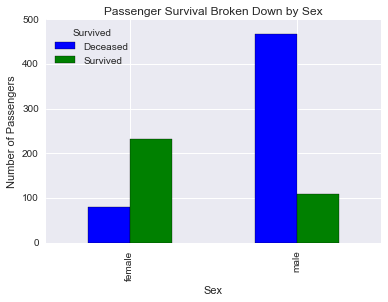

In [88]:
ax_1 = data_full.groupby(['Sex','Survived'])['PassengerId'].count().unstack().plot(kind='bar', 
        title = "Passenger Survival Broken Down by Sex")
ax_1 = ylabel("Number of Passengers")

#### Looking at the data broken down by gender clearly shows that the males were the highest number of deceased passengers.